# Getting Data

* **Import elementary libraries to extract and treat our data.**

In [66]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* **Download our data using Yahoo Finance**

In [ ]:
# Range of dates that we will use for our analysis
start_date = '2000-01-01'
end_date = '2023-02-27'

# Donwload data to analyze the market in general (S&P500, Gold, Crude and AI ETF)
sp500_index = yf.download("^GSPC",start = start_date, end= end_date)
gold = yf.download("GC=F",start = start_date, end= end_date)
crude = yf.download("CL=F",start = start_date, end= end_date)
robo = yf.download("ROBO",start = start_date, end= end_date)
botz = yf.download("BOTZ",start = start_date, end= end_date)

# We will also extract the data for sectors and subsector (S&P 500)
companies_url = 'https://es.wikipedia.org/wiki/Anexo:Compa%C3%B1%C3%ADas_del_S%26P_500'
sp500_companies = pd.read_html(companies_url)[2][['Símbolo', 'Sector GICS', 'Sub-industria GICS']]
sp500_companies.rename(columns={'Símbolo': 'Symbol', 'Sector GICS': 'Sector', 'Sub-industria GICS': 'Subsector'}, inplace=True)
sp500_companies['Symbol'] = sp500_companies['Symbol'].str.strip().replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})

sp500_data = pd.DataFrame()

# Getting Data for each company
for _, company in sp500_companies.iterrows():
    symbol = company['Symbol']
    sector = company['Sector']
    subsector = company['Subsector']
    data = yf.download(symbol, start=start_date, end=end_date)
    if len(data) > 0:
        data['Symbol'] = symbol
        data['Sector'] = sector
        data['Subsector'] = subsector
        sp500_data = sp500_data.append(data)

# Filter for each subsector
subsectors = sp500_data['Subsector'].unique() #label of each subsector
subsector_data = {}  #dictionary
for subsector in subsectors:
    subsector_data[subsector] = sp500_data[sp500_data['Subsector'] == subsector]

# Adding symbols to ETF's
robo['Symbol'] = "ROBO"
botz['Symbol'] = "BOTZ"

In [51]:
# Calculate Daily Return.
sp500_index['daily_return']=sp500_index['Adj Close'].pct_change()
gold['daily_return'] = gold['Adj Close'].pct_change()
crude['daily_return'] = crude['Adj Close'].pct_change()
robo['daily_return'] = robo['Adj Close'].pct_change()
botz['daily_return'] = botz['Adj Close'].pct_change()
sp500_data['daily_return'] = sp500_data['Adj Close'].pct_change()


In [52]:

ETF = pd.concat([robo,botz],axis = 0)

# Store our data into "CSV"

In [54]:
sp500_index.to_csv("sp500_index.csv")
sp500_data.to_csv("sp500_data.csv")
gold.to_csv("gold.csv")
crude.to_csv("crude.csv")
robo.to_csv("robo.csv")
botz.to_csv("botz.csv")
ETF.to_csv("ETF.csv")

* **Now we start checking our data**

In [55]:
sp500_index.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345


In [56]:
sp500_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,Subsector,daily_return
Date,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM,Industriales,Conglomerados Industriales,NaN
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511257,2713800,MMM,Industriales,Conglomerados Industriales,-0.039735


In [57]:
gold.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,NaN
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,0.016064


In [58]:
crude.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,NaN
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,-0.013105


In [59]:
robo.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return,Symbol
Date,,,,,,,,
2013-10-22,24.910000,25.330000,24.91,25.320000,24.839716,227000,NaN,ROBO
2013-10-23,25.299999,25.299999,24.85,24.959999,24.486544,84900,-0.014218,ROBO


In [60]:
botz.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return,Symbol
Date,,,,,,,,
2016-09-13,14.76,14.76,14.76,14.76,14.315842,300,NaN,BOTZ
2016-09-14,14.76,14.76,14.76,14.76,14.315842,0,0.0,BOTZ


# Exploratory Data Analysis (EDA)

* **Verify if We have duplicated values in our S&P 500 Data**

In [31]:
sp500_index[sp500_index.duplicated()]

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,


* **We will also check the same thing for our complementary data (Sectors, ETF and Commodities)**

In [ ]:
# As We could see, We found some duplicates, but if we analyze them, We will see
# that they are not duplicated values. They appear because We have the Date as Index
# making python to ignore the value of date and only consider the other ones.

sp500_data[sp500_data.duplicated()]

In [ ]:
# No real duplicates
gold[gold.duplicated()]

In [70]:
# No duplicates
crude[crude.duplicated()]

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,


In [71]:
# No real duplicates (Date ignored)
ETF[ETF.duplicated()]

,Open,High,Low,Close,Adj Close,Volume,daily_return,Symbol
Date,,,,,,,,
2016-09-15,14.76,14.76,14.76,14.76,14.315842,0,0.0,BOTZ


* **Verify if We have Null values in our S&P 500 Data**

In [62]:
sp500_index.isnull().sum()

# We confirm that We don't have any null value. The 1 value returned in daily_return
# it's because that column has to start with a Null value because it's the beginning
# of the daily return.

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    1
dtype: int64

* **We will also check for Null values for our complementary data (Sectors, ETF and Commodities)**

In [72]:
# Apply the same thing said for our Index (The beginning value)
sp500_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Symbol          0
Sector          0
Subsector       0
daily_return    1
dtype: int64

In [73]:
gold.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    1
dtype: int64

In [74]:
crude.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    1
dtype: int64

In [75]:
# Here We have 2 values, because we concatenated the 2 CSV of our ETF's (2 Beginning values)
ETF.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    2
Symbol          0
dtype: int64

* **Check for Atypical Values for all our dataset**

In most of the cases if We find some it's because and important event happened (Positive or Negative)

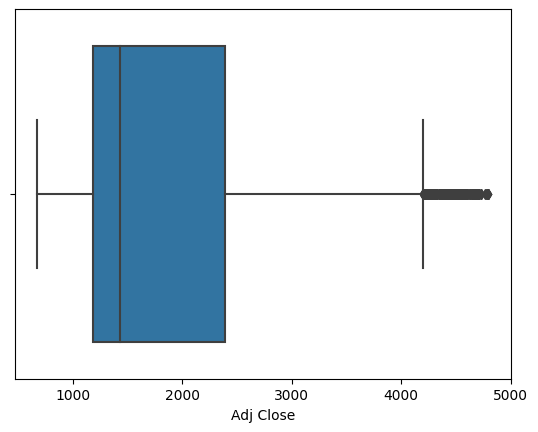

In [67]:
sns.boxplot(x = 'Adj Close', data = sp500_index)
plt.show()

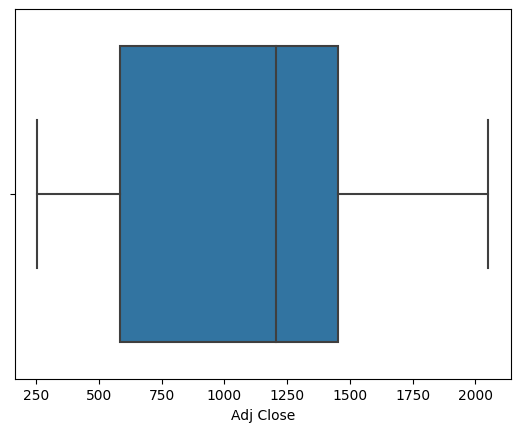

In [76]:
sns.boxplot(x = 'Adj Close', data = gold)
plt.show()

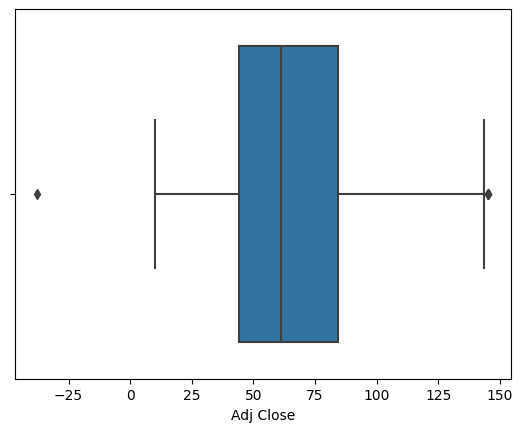

In [77]:
sns.boxplot(x = 'Adj Close', data = crude)
plt.show()

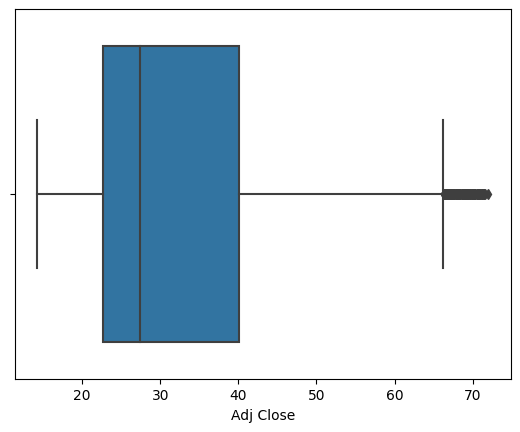

In [78]:
sns.boxplot(x = 'Adj Close', data = ETF)
plt.show()

## **The rest of our analysis will be made directly in Power Bi, please go to the BI dashboard to continue.**